In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [12]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
data.shape

(284807, 31)

In [17]:
#checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
#There is no missing values in the dataset


0    284315
1       492
Name: Class, dtype: int64


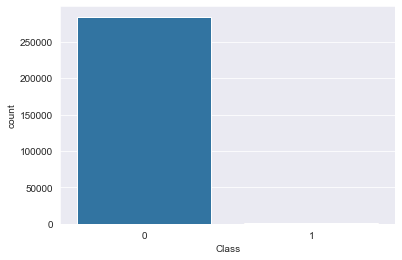

In [19]:
import seaborn as sns
print(data['Class'].value_counts())
sns.set_style("darkgrid")
sns.countplot(data['Class'])

In [20]:
#This shows that one data is imbalanced, There are only few fraudlent transactions
#so accuracy is not the best option to compare the performance of the model
#other performance metrices are confusion matrix, precision, recall &F1 score


In [21]:
#precision = No. of true positives/No. of true positives & false positives
#A low value of precision means a large number of false positives
#Recall = No. of true positives/ No. of true positives and false negatives
# A low value of recall indicates a large no. of false negatives
#F1 Score=2**(precision*recall)/precision+recall

In [22]:
fraud_data=data[data['Class']==1]
genuine_data=data[data['Class']==0]

In [23]:
fraud_data.Amount.describe()
genuine_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

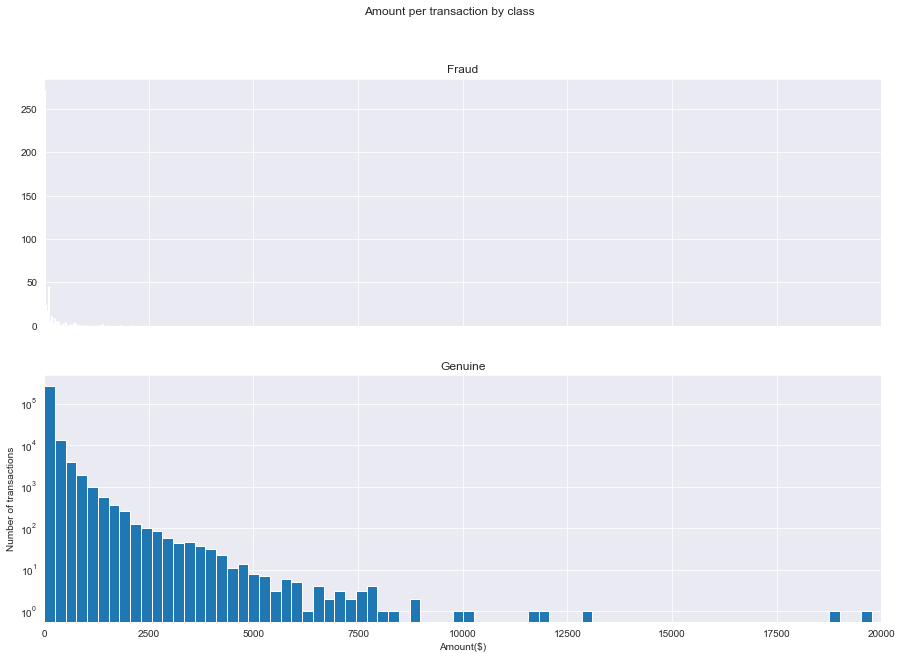

In [24]:
import matplotlib.pyplot as plt
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,10))
f.suptitle('Amount per transaction by class')
ax1.hist(fraud_data.Amount,100)
ax1.set_title('Fraud')
ax2.hist(genuine_data.Amount,100)
ax2.set_title('Genuine')
plt.xlabel('Amount($)')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

In [25]:
#splitting data before sampling
import sklearn
from sklearn.model_selection import train_test_split
x=data.drop('Class',axis=1)
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [26]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.metrics import classification_report_imbalanced

In [5]:
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [7]:
from imblearn.over_sampling import SMOTE

In [31]:
#scaling the amount column using a standard scaler


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data["Amount"]=scaler.fit_transform(np.array(data["Amount"]).reshape(-1,1))

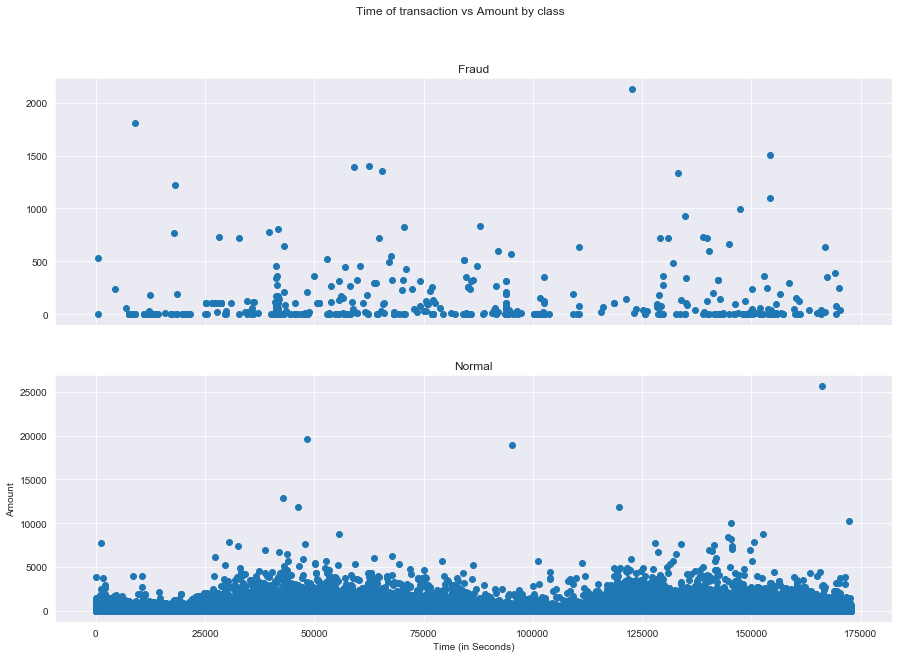

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time, fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine_data.Time, genuine_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [32]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x = data.drop("Class", axis=1)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 100)

In [33]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_sample(x_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 227449), (1, 227449)]


In [37]:
from sklearn.linear_model import LogisticRegression #Trying logistic regression with SMOTE
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
clf=LogisticRegression(solver='saga')
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

C:\Users\cinta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [38]:
#model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))

Accuracy: 0.9961904427513079
F1 score: 0.3022508038585209
Recall: 0.4895833333333333
Precision: 0.2186046511627907


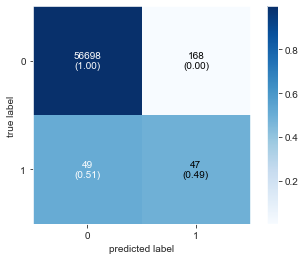

In [40]:
#plot confusion matrix(clf,x_test,y_test)
fig,ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),
                            show_absolute=True,
                            show_normed=True,
                            colorbar=True)
plt.show()

In [41]:
#Only very few fraudflent activities were detected


In [43]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

C:\Users\cinta\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.537375794389242
F1 Score: 0.005960015088645794
Recall: 0.8229166666666666
Precision: 0.0029908381918679486


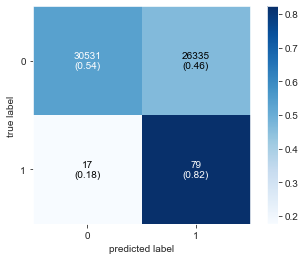

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [45]:
#Trying random forest with sampling
clf= RandomForestClassifier()
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

Accuracy: 0.9992802219023208
F1 Score: 0.7853403141361256
Recall: 0.78125
Precision: 0.7894736842105263


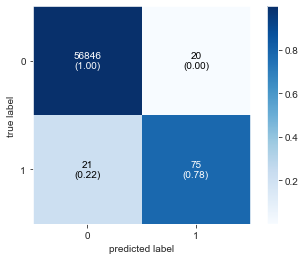

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [47]:
#Random forest with smote works really well.
#Decision trees generally perform well on imbalanced data. decision trees does not support missing values
#our data has no missing values

In [48]:
#Trying random forest without sampling
x= data.drop('Class',axis=1)
y = data['Class']

In [49]:
#split dataset into training set & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

Accuracy: 0.9993679997191109
F1 Score: 0.8105263157894737
Recall: 0.7333333333333333
Precision: 0.9058823529411765


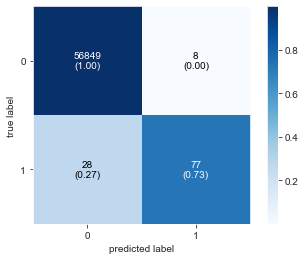

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


In [53]:
#Try gradient boosting without sampling
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(x_train,y_train)
prediction=clf.predict(x_test)

Accuracy: 0.9993679997191109
F1 Score: 0.8105263157894737
Recall: 0.7333333333333333
Precision: 0.9058823529411765


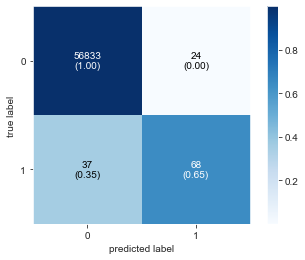

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()